# FIFA Data Analysis and Visualization
FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. Announced on 6 June 2018 for its E3 2018 press conference, it was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.It is the 26th installment in the FIFA series. As with FIFA 18, Cristiano Ronaldo initially as the cover athlete of the regular edition: however, following his unanticipated transfer from Spanish club Real Madrid to Italian side Juventus, new cover art was released, featuring Neymar, Kevin De Bruyne and Paulo Dybala.

The game features the UEFA club competitions for the first time, including the UEFA Champions League and UEFA Europa League.Martin Tyler and Alan Smith return as regular commentators, while the new commentary team of Derek Rae and Lee Dixon feature in the UEFA competitions mode.Composer Hans Zimmer and rapper Vince Staples recorded a new remix of the UEFA Champions League anthem specifically for the game. The character Alex Hunter, who first appeared in FIFA 17 returns for the third and final installment of "The Journey", entitled, "The Journey: Champions".In June 2019, a free update added the FIFA Women's World Cup as a separate game mode.

This is the last game in the FIFA series to be available on a seventh-generation console, and the last known game to be available for the PlayStation 3 worldwide.

### Used Libraries
1. NumPy (Numerical Python)
2. Pandas
3. Matplotlib
4. Seaborn
5. Plotly

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fifa19/data.csv


### Content:
1. Seaborn - Heatmap
2. Seaborn - Bar Plots
3. Plotly - Bar Plots
4. Word Cloud
5. Plotly - Pie Charts
6. Plotly - Box Plots

### Reading Data

In [2]:
df=pd.read_csv("../input/fifa19/data.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
#df.info()

In [5]:
#df.columns

### Data Cleaning
Removed unnecessary columns

In [6]:
df.drop(columns=['Unnamed: 0','Photo','Flag','Club Logo'],inplace=True)

# Seaborn - Heatmap
### Relationship between columns
* 01 --> Direct proportion
* 00 --> No relationship
* -1 --> İnverse proportion

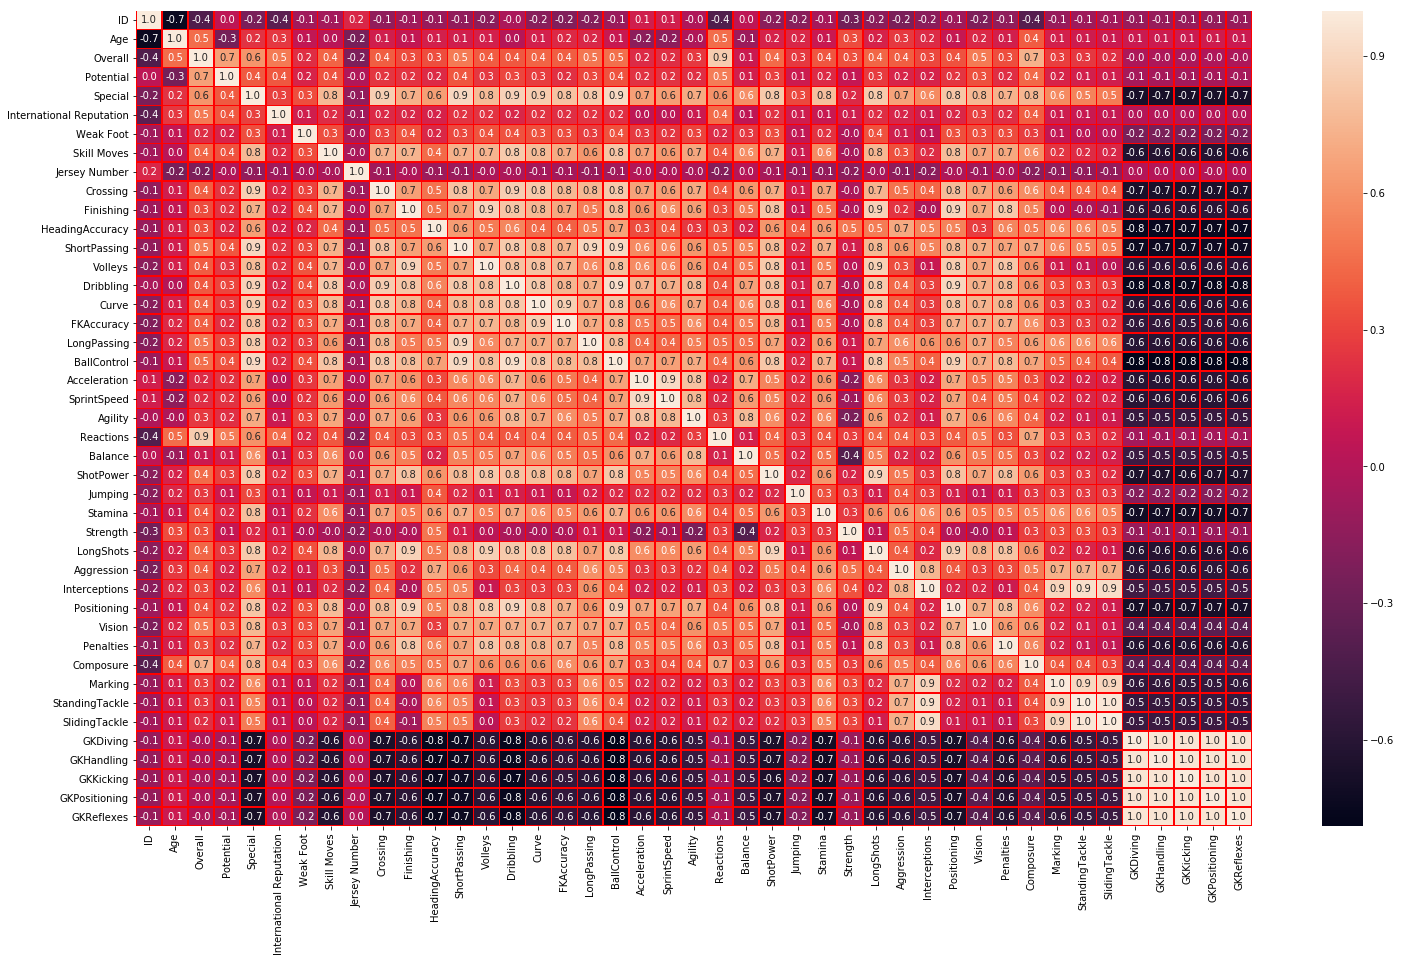

In [7]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

# Seaborn - Bar Plot

[Text(0, 0.5, 'Nationality'),
 Text(0.5, 0, 'Value'),
 Text(0.5, 1.0, 'Nationality Player Max - Mean - Min Value')]

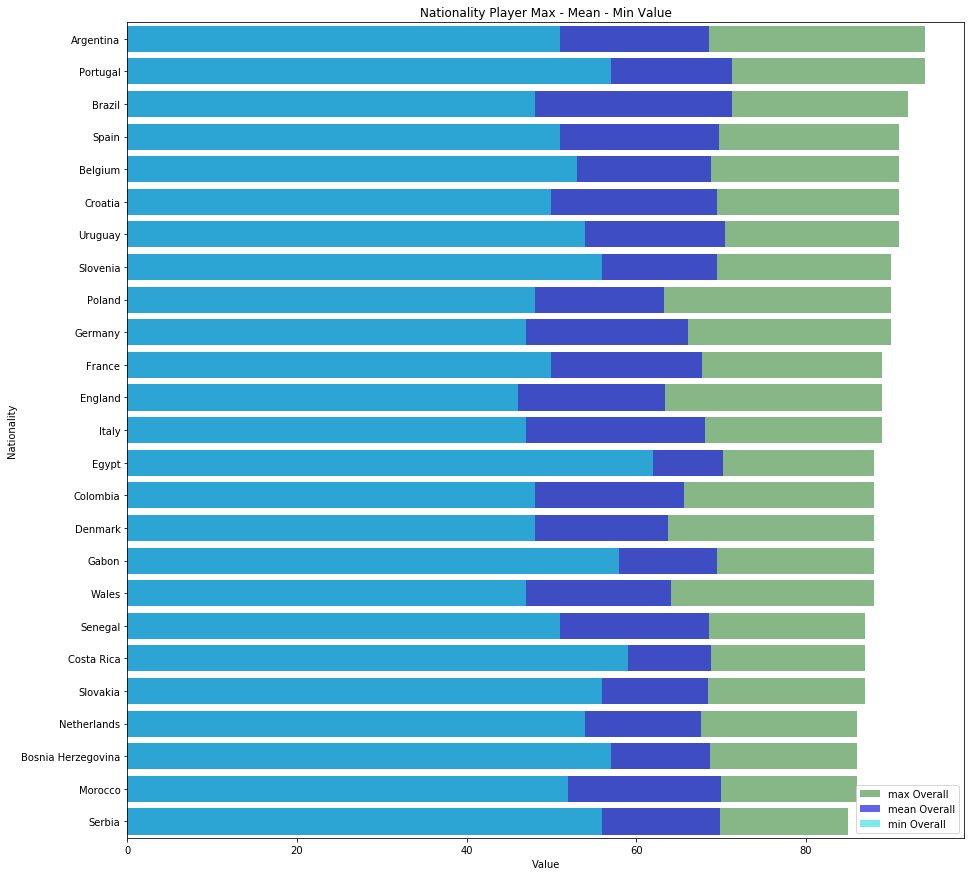

In [8]:
nationalityDf = pd.DataFrame(columns = ['Nationality'])
nationalityDf["Nationality"]=[each for each in df.Nationality.unique()]
nationalityDf["maxOverall"]=[df.Overall[df.Nationality==each].max() for each in nationalityDf.Nationality]
nationalityDf["meanOverall"]=[df.Overall[df.Nationality==each].mean() for each in nationalityDf.Nationality]
nationalityDf["minOverall"]=[df.Overall[df.Nationality==each].min() for each in nationalityDf.Nationality]
nationalityDf.sort_values(by=['maxOverall','meanOverall','minOverall'],ascending=False)
nationalityDf=nationalityDf.head(25)
# visualization
f,ax = plt.subplots(figsize = (15,15))
sns.barplot(x=nationalityDf.maxOverall,y=nationalityDf.Nationality,color='green',alpha = 0.5,label='max Overall' )
sns.barplot(x=nationalityDf.meanOverall,y=nationalityDf.Nationality,color='blue',alpha = 0.7,label='mean Overall')
sns.barplot(x=nationalityDf.minOverall,y=nationalityDf.Nationality,color='cyan',alpha = 0.6,label='min Overall')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Value', ylabel='Nationality',title = "Nationality Player Max - Mean - Min Value")

# Plotly - Box Plots ( interactive )
It takes RGB "0-255" for all values for opacity "0-1"

In [9]:
ClubDf = pd.DataFrame(columns = ['Club'])
ClubDf["Club"]=[each for each in df.Club.unique()]
ClubDf["maxOverall"]=[df.Overall[df.Club==each].max() for each in ClubDf.Club]
ClubDf["meanOverall"]=[df.Overall[df.Club==each].mean() for each in ClubDf.Club]
ClubDf["minOverall"]=[df.Overall[df.Club==each].min() for each in ClubDf.Club]
ClubDf.sort_values(by=['maxOverall','meanOverall','minOverall'],ascending=False)
ClubDf=ClubDf.head(25)
# create trace1 
trace1 = go.Bar(
                x = ClubDf.Club,
                y = ClubDf.maxOverall,
                name = "Max Overall Value",
                marker = dict(color = 'rgba(55, 114, 55, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = ClubDf.Club)
# create trace2 
trace2 = go.Bar(
                x = ClubDf.Club,
                y = ClubDf.meanOverall,
                name = "Mean Overall Value",
                marker = dict(color = 'rgba(235, 155, 12, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = ClubDf.Club)
# create trace3 
trace3 = go.Bar(
                x = ClubDf.Club,
                y = ClubDf.minOverall,
                name = "Min Overall Value",
                marker = dict(color = 'rgba(235, 155, 162, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = ClubDf.Club)
data = [trace1, trace2, trace3]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Word Cloud
Nationality Text Size = Nationality Player Count

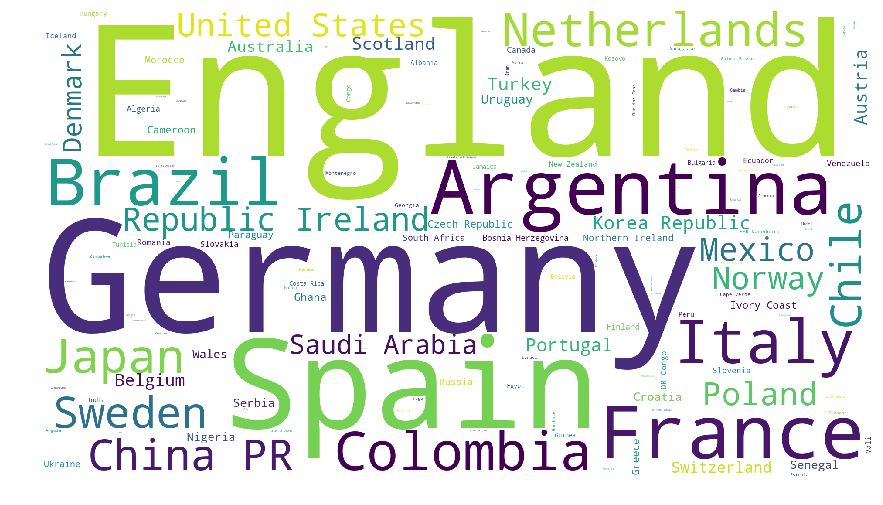

In [10]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

# Plotly - Pie Chart ( interactive )
### Effect of preferred foot on position
* GK (Goalkeeper)
* RB (Right Back)
* RWB (Right Wing Back)
* LB (Lef Back)
* LWB (Lef Wing Back)
* CB (Center Back)
* RCB (Right Center Back)
* LCB (Left Center Back)
* CM (Center Midfielder)
* RCM (Right Center Midfielder)
* LCM (Left Center Midfielder)
* CDM (Center Defensive Midfielder)
* RCDM (Right Center Defensive Midfielder)
* LCDM (Left Center Defensive Midfielder
* CAM (Center Attacking Midfielder)
* RM (Right Midfielder)
* RWM (Right Wing Midfielder)
* LM (Left Midfielder)
* LWM (Left Wing Midfielder)
* ST (Striker)
* CF (Center Forward)
* RF (Right Forward)
* LF (Left Forward)
* SF (Secret Forward)

In [11]:
LeftLabels = df[df["Preferred Foot"]=="Left"].Position.value_counts().head(10).index
LeftValues = df[df["Preferred Foot"]=="Left"].Position.value_counts().head(10).values
RightLabels = df[df["Preferred Foot"]=="Right"].Position.value_counts().head(10).index
RightValues = df[df["Preferred Foot"]=="Right"].Position.value_counts().head(10).values

from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=LeftLabels, values=LeftValues, name="Left Foot Preferred"),
              1, 1)
fig.add_trace(go.Pie(labels=RightLabels, values=RightValues, name="Right Foot Preferred"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='LEFT', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='RİGHT', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

# Plotly - Box Plots ( interactive )
### Barcelona vs Real Madrid (min,q1,median,q3,max value)

In [12]:
team1 = df[df.Club=="FC Barcelona"].Overall
team2 = df[df.Club=="Real Madrid"].Overall

fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=team1, name='FC Barcelona'))
fig.add_trace(go.Box(x=team2, name='Real Madrid'))

fig.show()